In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

In [81]:
make_circles?

Signature:
make_circles(
    n_samples=100,
    *,
    shuffle=True,
    noise=None,
    random_state=None,
    factor=0.8,
)
Docstring:
Make a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification
algorithms.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or tuple of shape (2,), dtype=int, default=100
    If int, it is the total number of points generated.
    For odd numbers, the inner circle will have one point more than the
    outer circle.
    If two-element tuple, number of points in outer circle and inner
    circle.

    .. versionchanged:: 0.23
       Added two-element tuple.

shuffle : bool, default=True
    Whether to shuffle the samples.

noise : float, default=None
    Standard deviation of Gaussian noise added to the data.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for dataset shuffling and noise.
    Pas

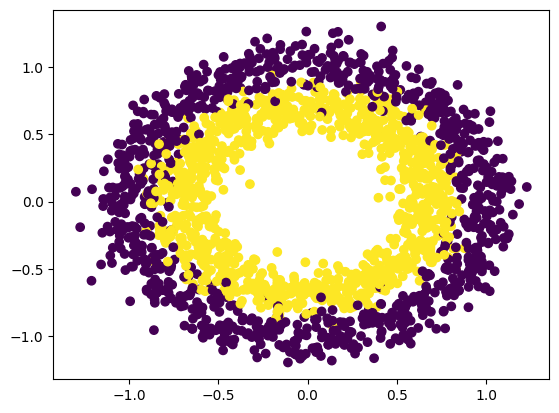

In [82]:
x,y=make_circles(n_samples=2000,random_state=30,noise=0.1,factor=0.7)
plt.scatter(x[:,0],x[:,1],c=y)                   #to visulaize a difference in noise

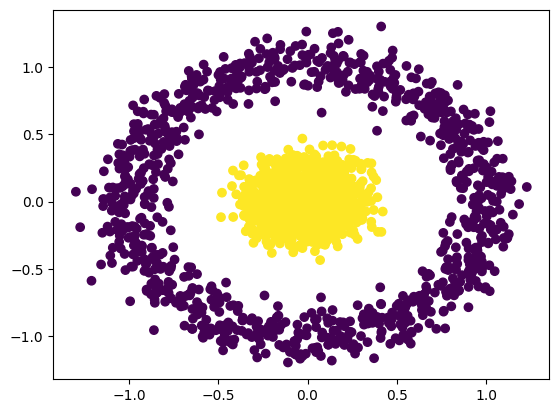

In [83]:
x,y=make_circles(n_samples=2000,random_state=30,noise=0.1,factor=0.2)
plt.scatter(x[:,0],x[:,1],c=y)              #to visualize a difference in factor

In [84]:
data,label=make_circles(n_samples=2000,random_state=30,noise=0.01,factor=0.7)

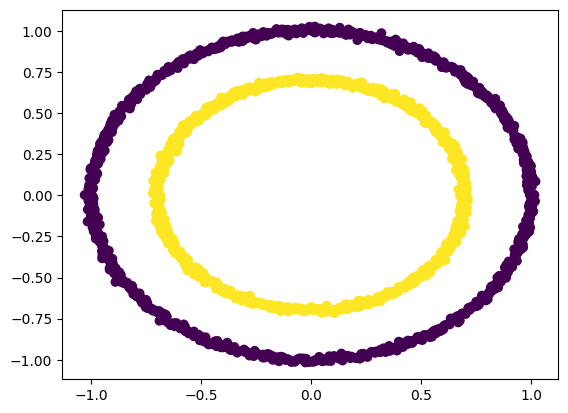

In [85]:
plt.scatter(data[:,0],data[:,1],c=label)

In [86]:
data.shape

(2000, 2)

In [87]:
data

array([[ 0.41603196, -0.55221846],
       [-0.64915783,  0.78057481],
       [ 0.65296195, -0.23421   ],
       ...,
       [ 0.93395924, -0.36026402],
       [-0.89056639,  0.47437421],
       [ 0.32720238, -0.60743204]])

In [88]:
data[:,0]

array([ 0.41603196, -0.64915783,  0.65296195, ...,  0.93395924,
       -0.89056639,  0.32720238])

In [89]:
axis1=data[:,0].reshape(-1,1)
axis2=data[:,1].reshape(-1,1)
axis3=axis1**2 + axis2**2              #adding a third dimension


In [90]:
axis3

array([[0.47802782],
       [1.03070293],
       [0.48121363],
       ...,
       [1.00207002],
       [1.01813939],
       [0.47603508]])

In [91]:
X=np.hstack((data,axis3))

In [92]:
X

array([[ 0.41603196, -0.55221846,  0.47802782],
       [-0.64915783,  0.78057481,  1.03070293],
       [ 0.65296195, -0.23421   ,  0.48121363],
       ...,
       [ 0.93395924, -0.36026402,  1.00207002],
       [-0.89056639,  0.47437421,  1.01813939],
       [ 0.32720238, -0.60743204,  0.47603508]])

In [93]:
X.shape

(2000, 3)

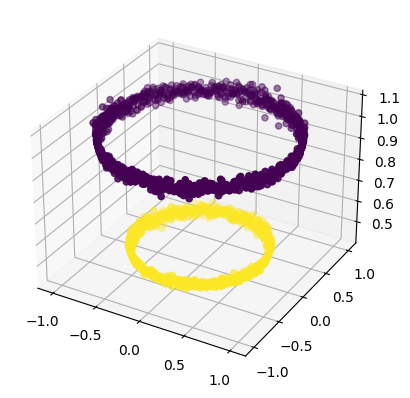

In [94]:
axes=plt.subplot(projection="3d")
axes.scatter(axis1,axis2,axis3,c=label)
plt.show()

In [95]:
svc=svm.SVC?

Init signature:
svm.SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see

In [96]:
svc=svm.SVC(kernel="linear")    #Support Vector Classifier

In [97]:
svc.fit(X,label)

SVC(kernel='linear')

In [98]:
svc.score(X,label)

1.0

In [99]:
weights=svc.coef_
bias=svc.intercept_

In [100]:
weights.shape

(1, 3)

In [101]:
weights

array([[ 0.00768991,  0.00553454, -4.61175419]])

In [102]:
bias

array([3.41204538])

In [103]:
mesh_x,mesh_y=np.meshgrid(X[:,0],X[:,1])  #surface can now be created if this step is not done then it would create a wierd circle rather than a plane 

In [104]:
plane =-(weights[0][0]*mesh_x + weights[0][1]*mesh_y + bias[0])/weights[0][2]     #utlize the formula for the decision boundry 

In [105]:
plane.shape

(2000, 2000)

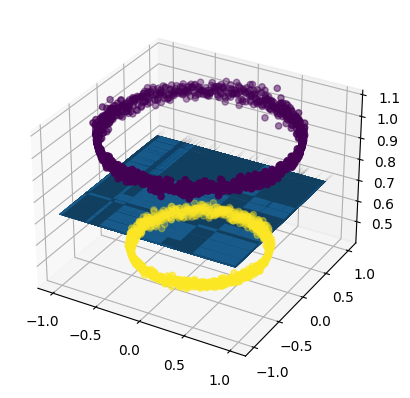

In [106]:
axes=plt.subplot(projection="3d")
axes.scatter(axis1,axis2,axis3,c=label)
axes.plot_surface(mesh_x,mesh_y,plane)       #for plotting the mesh grid or a plane in between rest of the plot code is same as above 
plt.show()

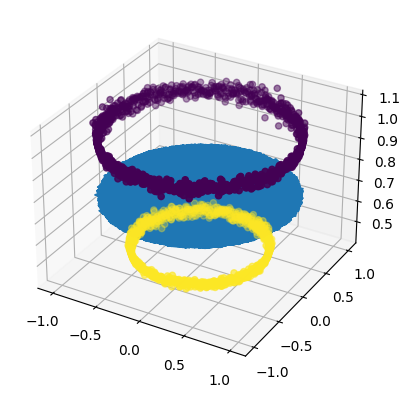

In [107]:
plane =-(weights[0][0]*X[:,0] + weights[0][1]*X[:,1] + bias[0])/weights[0][2] 
axes=plt.subplot(projection="3d")
axes.scatter(axis1,axis2,axis3,c=label)
axes.plot(X[:,0],X[:,1],plane)       #to show what will happen if mesh is not used
plt.show()